# Exploratory Data Analysis

Outline:
* Intro
* Process outline
* Univariate Analysis
 * Statistics for Univariate Analyis
* Multivariate Analysis
 * Statistics for Multivariate Analysis
 
_Material in these slides pulled from online and offline sources including  but not limited to wikipedia, Think Stats, Data Science from Scratch, and Elements of Data Analytic Style, Experimental Design and Analysis_

#  Introduction to Exploratory Data Analysis

>  **exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. ... Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. 

... _from wikipedia_

> The objectives of EDA are to:
> * Suggest hypotheses about the causes of observed phenomena
> * Assess assumptions on which statistical inference will be based
> * Support the selection of appropriate statistical tools and techniques
> * Provide a basis for further data collection through surveys or experiments[5]

The main reasons we use EDA are:
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory and outcome variables

High level steps:
* Ask an analytic question
* Tidy your data
* Understand your data
* Look for nulls (check the data)
* Exploratory Analysis (the focus of this lecture)

Exploratory data analysis is generally cross-classified in two ways
* non-graphical vs. graphical
* univariate or multivariate

## Non-graphical Univariate Methods
* Generally involve summary statistics
* For numeric values, we will use the Tukey five-number summary (min, max, median, 25th and 75th percentils)
* For categorical values, we can perform a tabulation of values

In [1]:
#  Let's load a sample dataset...

#  For most of our examples, we'll want to include the following 
#  libraries...
import pandas as pd
import seaborn as sns
import numpy as np

Seaborn includes several sample datasets that we can use for convenience.  The `planets` set includes information about planets from the NASA Exoplanet Archive.

In [2]:
# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Sat Feb 15 11:18:19 2014
#
# COLUMN pl_discmethod:  Discovery Method
# COLUMN pl_pnum:        Number of Planets in System
# COLUMN pl_orbper:      Orbital Period (val)
# COLUMN pl_msinij:      Planet M*sin(i) [jup] (val)
# COLUMN st_dist:        Distance (val)
# COLUMN pl_disc:        Year of Discovery

That header was at the top of the CSV file that holds the data.  

Despite being a built-in dataset to seaborn, I had to dig more than I expected to learn about the dataset itself.  Even now, I'm googling to see what these things mean.

In [3]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


`df.head()` will give us the first several rows of the dataframe.  `df.shape` will tell us how many rows and columns we have.

In [4]:
df.shape

(1035, 6)

The format we have here is what we call "wide format" _tidy_ data.  The Tidy Data concept comes from Hadley Wickham and states, more or less, that datasets should look like database tables:  each row is a sample and each column is an _attribute_ of that sample.

There's also a long-format version of tidy data, shown below.

In [5]:
#  First we add the row id from the index into the dataframe as a column
df['id'] = df.index
#  Then we melt, telling it that "id" is an important identifier.
melted = df.melt(id_vars=["id"])

#  Then we can see all the rows in the long-format tidy dataframe that
#  correspond with the first row from the wide-format version.
melted[melted["id"] == 0]

,id,variable,value
0,0,method,Radial Velocity
1035,0,number,1
2070,0,orbital_period,269.3
3105,0,mass,7.1
4140,0,distance,77.4
5175,0,year,2006


Now let's look at the Tukey summary for a quantitative column, `mass`.

In [6]:
#  To get the five number summary, we can run `describe` 
#  on the column of interest.
df.mass.describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

In [7]:
#  We can also run it on the entire dataframe
df.describe()

,number,orbital_period,mass,distance,year,id
count,1035.000000,992.000000,513.000000,808.000000,1035.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531,517.000000
std,1.240976,26014.728304,3.818617,733.116493,3.972567,298.923067
min,1.000000,0.090706,0.003600,1.350000,1989.000000,0.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000,258.500000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000,517.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000,775.500000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000,1034.000000


As we've discussed previously, the five-number summary helps describe the _central tendency_ of an attrbiute as well as its _spread_ and any _outliers_ we may have.

* Central tendency is measured via the mean, median, or mode.
* Spread (or dispersion) is described by the interquartile range (IQR)

Now let's look at one of the categorical variables:  `method`.  The things we might be interested in here are:

* the set of unique values
* the number of occureneces of each of these
* the relative frequency of each of those as a proportion of the whole set

In [8]:
df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [9]:
#  We can get the count-per-value as a pandas Series with .value_counts()
df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [10]:
#  We can also ask .value_counts() to normalize them as a percentage of the total.
df.method.value_counts(normalize=True)

Radial Velocity                  0.534300
Transit                          0.383575
Imaging                          0.036715
Microlensing                     0.022222
Eclipse Timing Variations        0.008696
Pulsar Timing                    0.004831
Transit Timing Variations        0.003865
Orbital Brightness Modulation    0.002899
Astrometry                       0.001932
Pulsation Timing Variations      0.000966
Name: method, dtype: float64

##  Graphical Univariate Methods

### Quantitative Variables
* Histograms
* Box plots

The most basic graph is the histogram, which is a barplot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values. 

C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


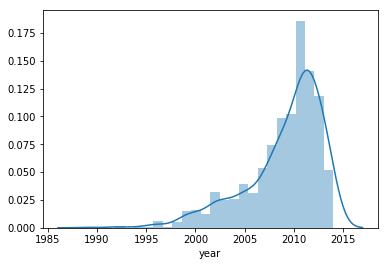

In [11]:
sns.distplot(df.year.dropna())

Boxplots are very good at presenting information about the central tendency,
symmetry and skew, as well as outliers, although they can be misleading about
aspects such as multimodality. One of the best uses of boxplots is in the form of
side-by-side boxplots (see multivariate graphical analysis below).

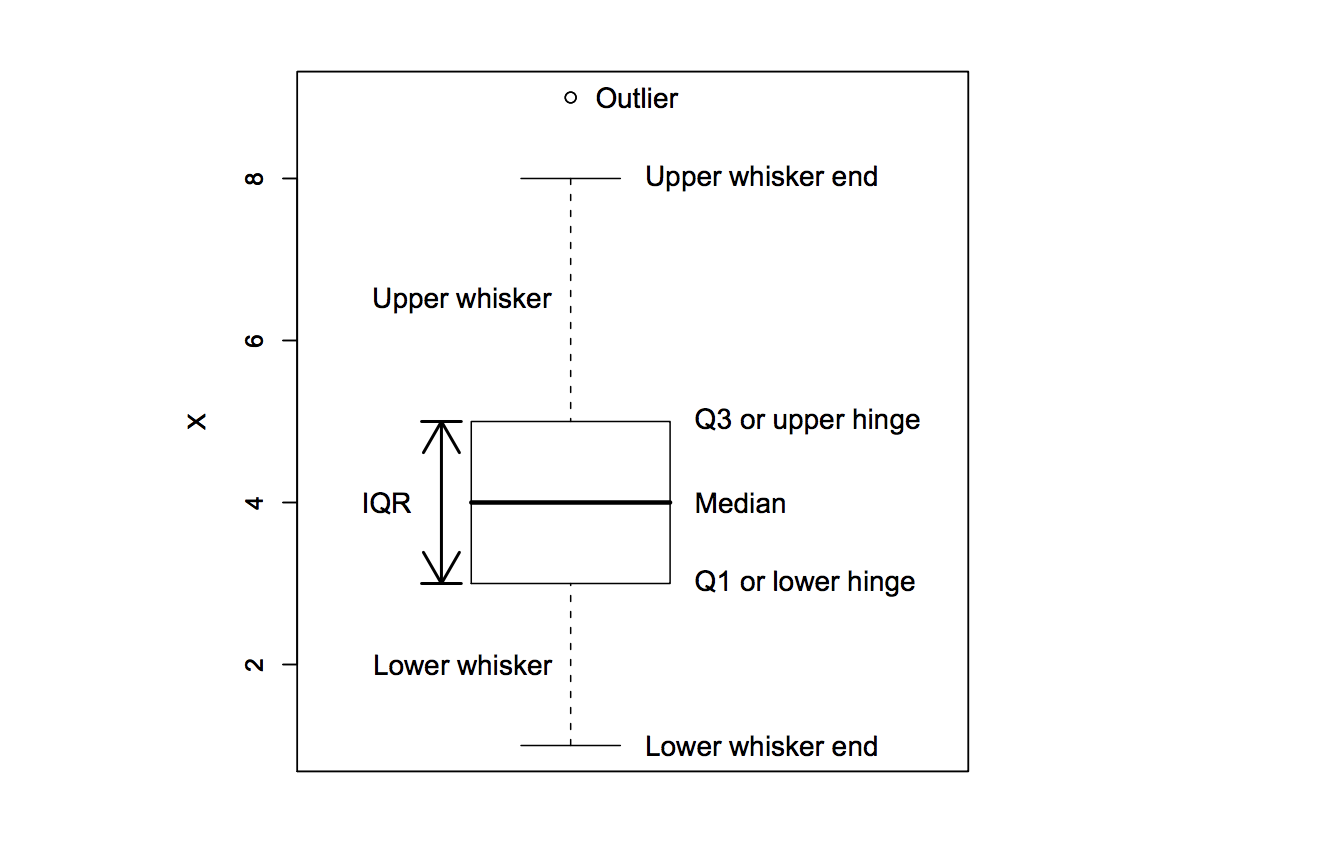

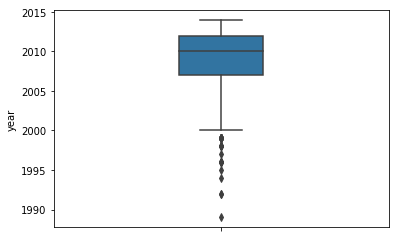

In [12]:
#  The width variable controls how wide the boxes are.  
#
#  The "whiskers" represnt about 1.5x IQR by default in seaborn.  For a normal distribution
#  50% of the population should be between Q2 and Q3 and 1.5 * IQR should hold about 
#  99% of our data.
sns.boxplot(y="year", data=df, width=0.25)

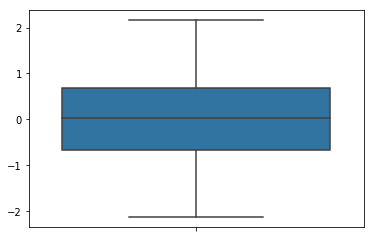

In [13]:
sns.boxplot(y=np.random.normal(size=200))

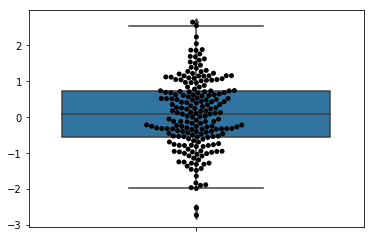

In [14]:
#  We can also combine related charts, like here where we show a swarmplot of values on top
#  of the boxplot for the same data.
data = np.random.normal(size=200)
sns.boxplot(y=data)
sns.swarmplot(y=data, color="black")

###  Categorical Data

For categorical data, we will usually display a bar graph of the various categories and their respective counts directly.

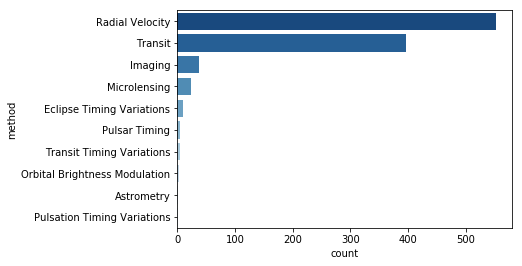

In [15]:
sns.countplot(data=df, y="method", palette="Blues_r", order=df.method.value_counts().index)

## Graphical Multivariate Methods

For multivariate methods, we can think about this as combinations of the above approaches.  This breaks down into two basic approaches:

* Univariate plots per category (for categorical vs. quantitative)
* Multiple bar charts (for categorical vs categorical)
* Scatterplots (for quantitative vs. quantitative)

#### Univariate plots per category
In seaborn, most plots "just work" with one variable being a categorical variable.  For example...

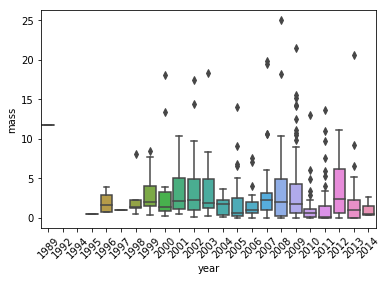

In [16]:
import matplotlib.pylab as plt
plt.xticks(rotation=45)
plot = sns.boxplot(data=df, y="mass", x="year")

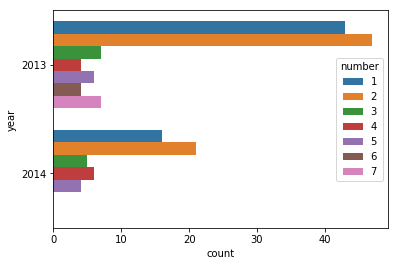

In [24]:
#  Multiple bar charts...
#  Filtered to just the last few years to show the additional detail
sns.countplot(data=df[df.year > 2012], y="year", hue="number")

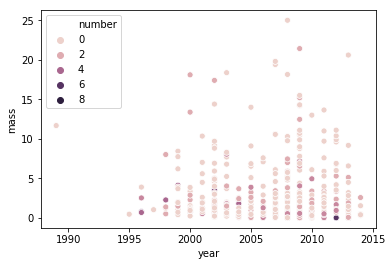

In [18]:
#  Note we can often use shape and hue (color) as additional dimensions in a plot.
sns.scatterplot(data=df, y="mass", x="year", hue="number")

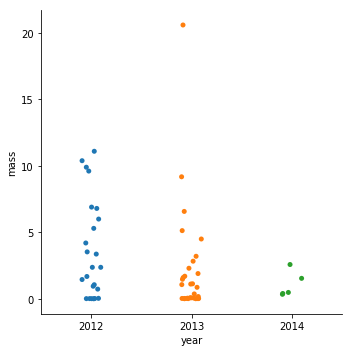

In [19]:
#  Here we view a subset of years to help illustrate the jitter of the values
#  in the quantitative variable.
sns.catplot(x="year", y="mass", data=df[df.year > 2011])

Lastly, seaborn has anticipated a lot of these needs, and so `sns.pairplot` exists to automagically handle plotting each attribute against each other attribute.

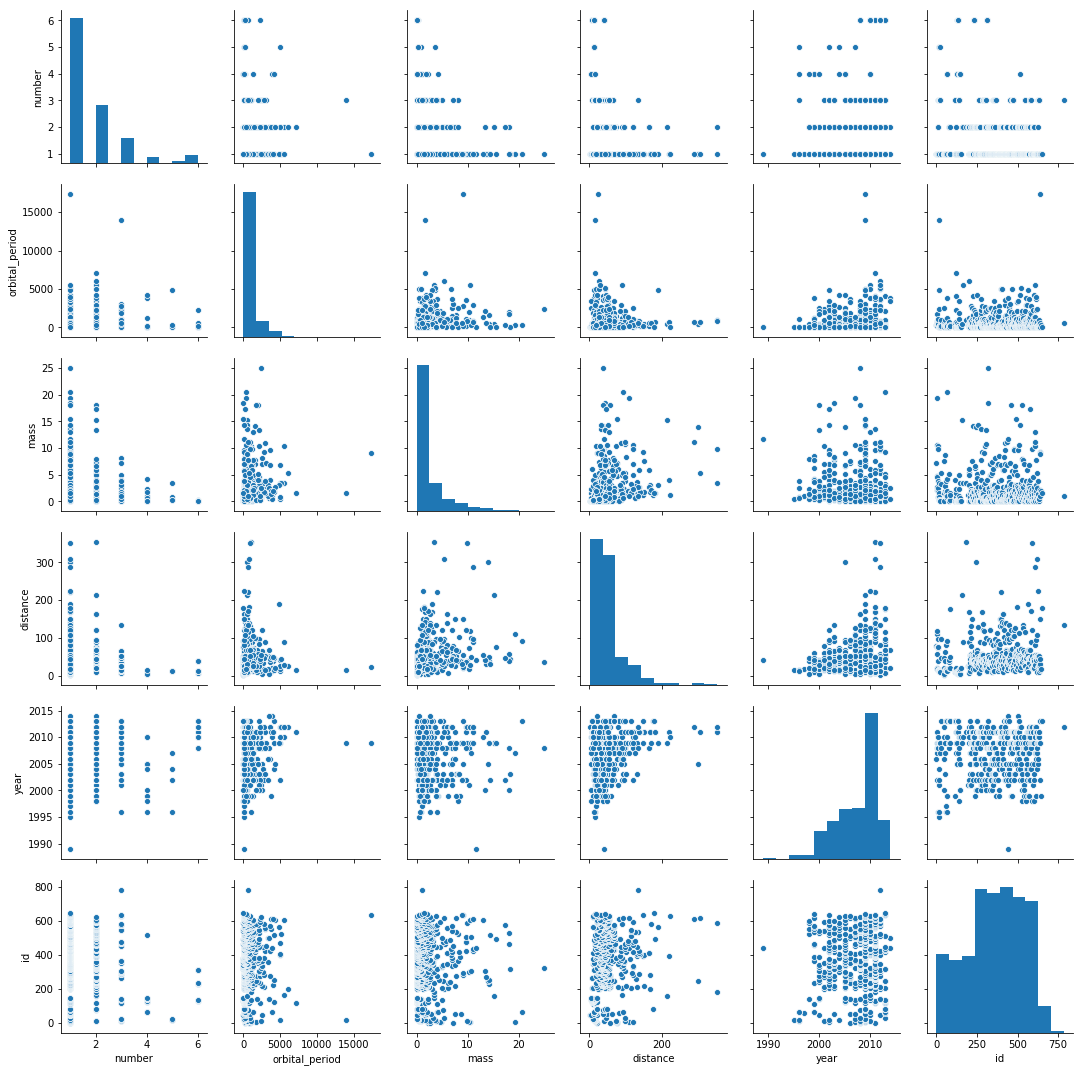

In [20]:
#  If we don't deal with missing values here, we get errors when they appear in calculations.
sns.pairplot(data=df.dropna())

C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, 

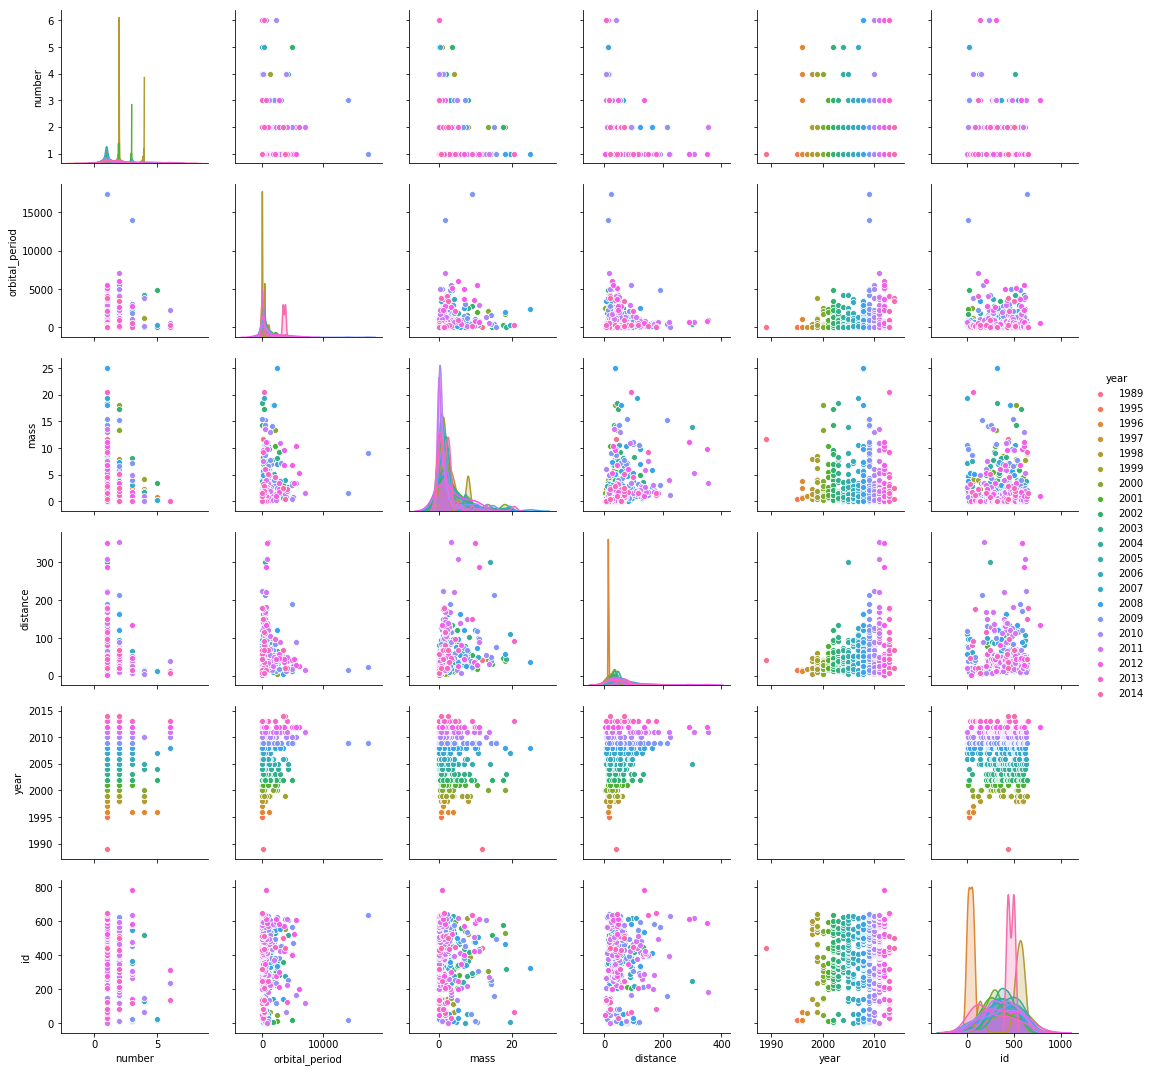

In [21]:
#  We can also colorize them based on some specific categorical variable using `hue`
sns.pairplot(data=df.dropna(), hue="year")